In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib widget

__file__ = "/leonardo_work/EUHPC_D12_053/stgcn-distributed/script/analyze_error_csv.py"

script_dir = os.path.dirname(os.path.abspath(__file__))
base_dir = os.path.abspath(os.path.join(script_dir, os.pardir))

In [ ]:
csv_file = "2025-02-17_11-53-02_metr-la_pred-15min_his-60min_centralized_analysis-neighbours-and-no-neighbours/val_metric/delta.csv"

path = os.path.join(base_dir, 'logs', csv_file)
print(f"Processing: {path}")

df = pd.read_csv(path, header=None)  # Assuming no headers
df = df.T

# df = df.iloc[:10,:100]
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

df_long = df.melt(value_vars=df.columns, ignore_index=False)
df_long = df_long.reset_index()
df_long = df_long.rename(columns={"index": "sensorId", "variable": "timestep", "value": "predictionDelta"})

Processing: /leonardo_work/EUHPC_D12_053/stgcn-distributed/logs/2025-02-17_11-53-02_metr-la_pred-15min_his-60min_centralized_analysis-neighbours-and-no-neighbours/val_metric/delta.csv
Rows: 207, Columns: 5125


,sensorId,timestep,predictionDelta
0,0,0,0.590942
1,1,0,0.660126
2,2,0,-4.167429
3,3,0,-2.711010
4,4,0,0.503082
5,5,0,3.156311
6,6,0,-1.010582
7,7,0,0.645760
8,8,0,-2.283043
9,9,0,1.149662


In [8]:
csv_file_2 = "2025-02-28_11-22-25_metr-la_pred-60min_his-60min_centralized_analysis-neighbours-and-no-neighbours/val_metric/delta.csv"

path_2 = os.path.join(base_dir, 'logs', csv_file_2)

df_2 = pd.read_csv(path_2, header=None)  # Assuming no headers
df_2 = df_2.T

# df = df.iloc[:10,:100]
print(f"Rows: {df_2.shape[0]}, Columns: {df_2.shape[1]}")

df_long_2 = df_2.melt(value_vars=df_2.columns, ignore_index=False)
df_long_2 = df_long_2.reset_index()
df_long_2 = df_long_2.rename(columns={"index": "sensorId", "variable": "timestep", "value": "predictionDelta"})

Rows: 207, Columns: 5116


In [4]:
csv_file_3 = "2025-03-04_15-23-17_metr-la_pred-60min_his-60min_centralized_analysis-neighbours-and-no-neighbours/val_metric/delta.csv"

path_3 = os.path.join(base_dir, 'logs', csv_file_3)

df_3 = pd.read_csv(path_3, header=None)  # Assuming no headers
df_3 = df_3.T

# df = df.iloc[:10,:100]
print(f"Rows: {df_3.shape[0]}, Columns: {df_3.shape[1]}")

df_long_3 = df_3.melt(value_vars=df_3.columns, ignore_index=False)
df_long_3 = df_long_3.reset_index()
df_long_3 = df_long_3.rename(columns={"index": "sensorId", "variable": "timestep", "value": "predictionDelta"})

Rows: 207, Columns: 4956


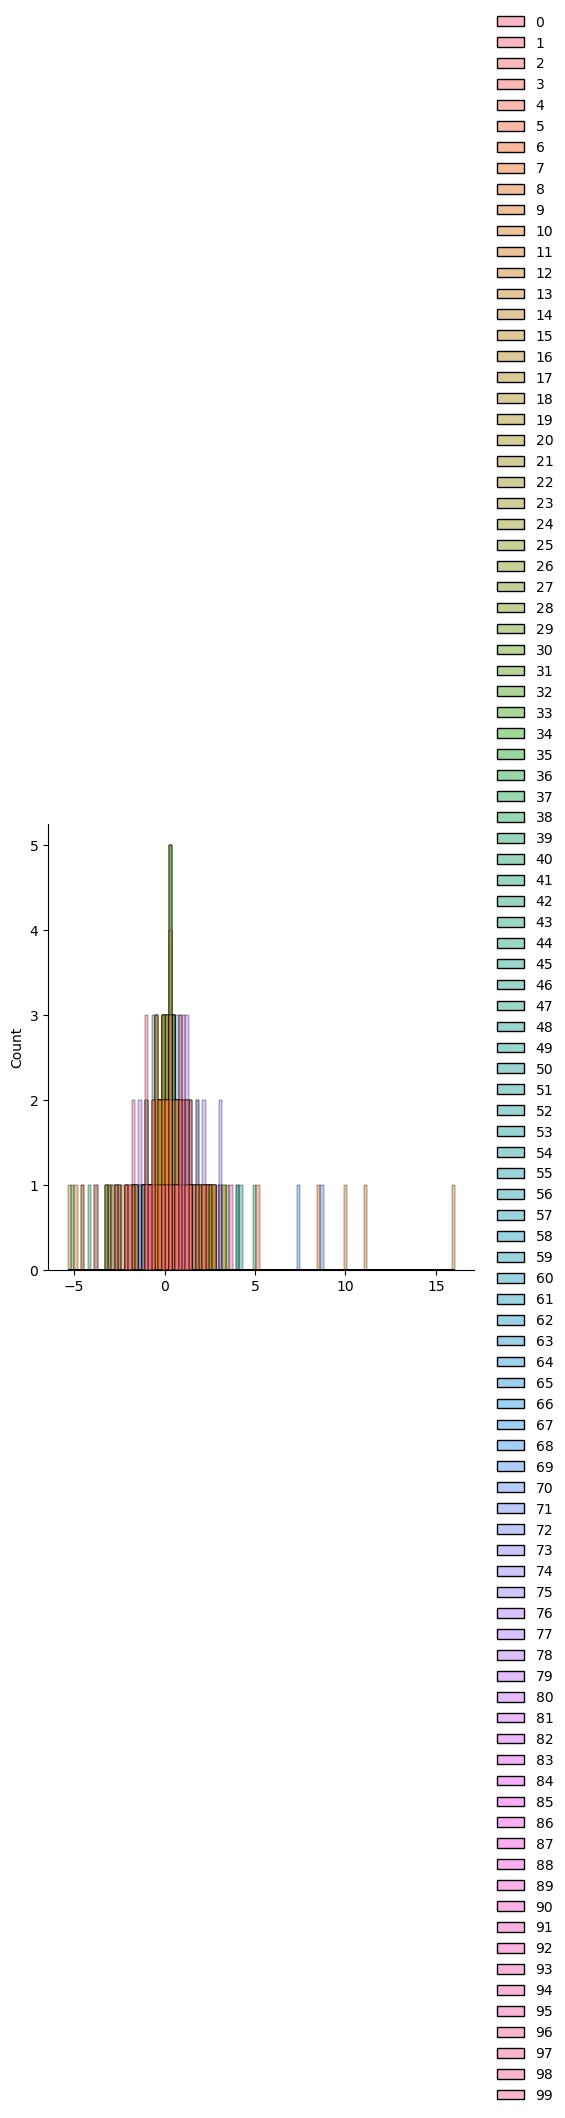

In [ ]:
plt.close()
sns.displot(data=df)

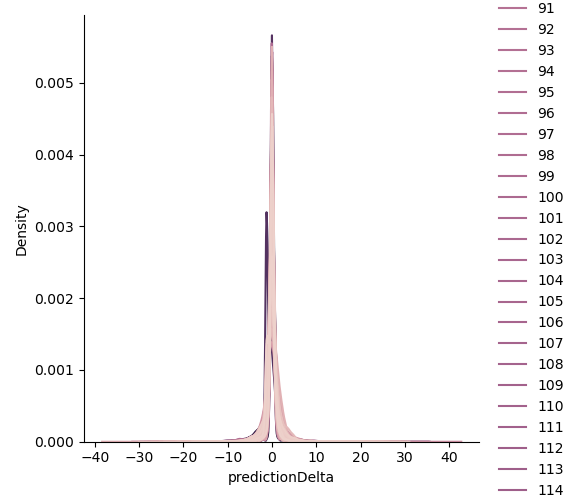

In [4]:
plt.close()
sns.displot(data=df_long, x="predictionDelta", hue="sensorId", kind="kde")

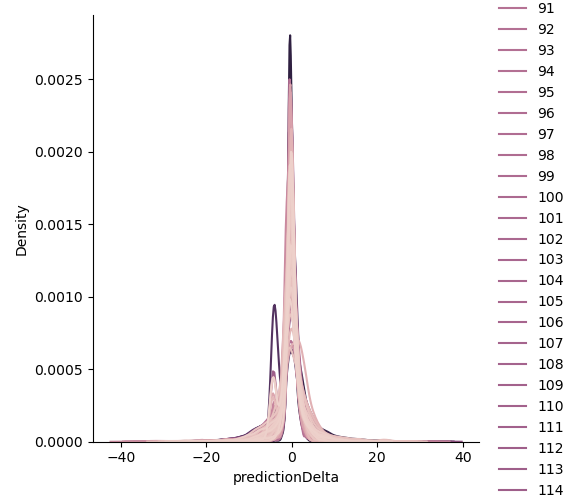

In [4]:
plt.close()
sns.displot(data=df_long_2, x="predictionDelta", hue="sensorId", kind="kde")

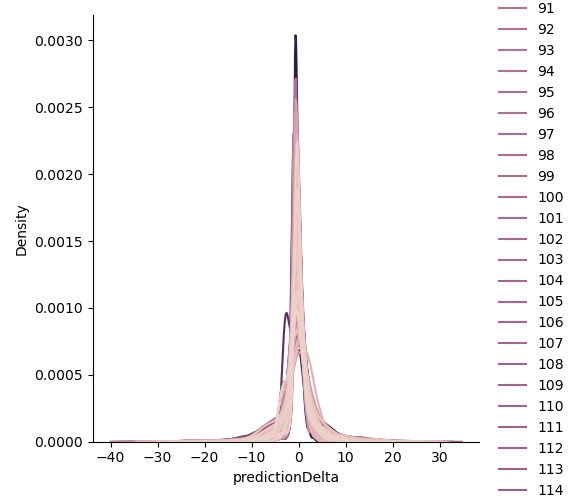

In [5]:
plt.close()
sns.displot(data=df_long_3, x="predictionDelta", hue="sensorId", kind="kde")

In [9]:
# Count how many predictionDelta values are between -6 and -3 for each sensor
df_sensor_count = df_long_2[(df_long_2["predictionDelta"] >= -6) & (df_long_2["predictionDelta"] <= -3)]
df_sensor_count = df_sensor_count.groupby("sensorId")["predictionDelta"].count()

# Sort by highest count and get top 20 sensors
df_sensor_count = df_sensor_count.sort_values(ascending=False).head(9)

# Print results
for sensor_id, count in df_sensor_count.items():
    print(f"Sensor {sensor_id}: Count of predictionDelta between -6 and -3 = {count}")

Sensor 174: Count of predictionDelta between -6 and -3 = 1978
Sensor 0: Count of predictionDelta between -6 and -3 = 955
Sensor 37: Count of predictionDelta between -6 and -3 = 940
Sensor 114: Count of predictionDelta between -6 and -3 = 936
Sensor 39: Count of predictionDelta between -6 and -3 = 728
Sensor 22: Count of predictionDelta between -6 and -3 = 701
Sensor 91: Count of predictionDelta between -6 and -3 = 655
Sensor 16: Count of predictionDelta between -6 and -3 = 583
Sensor 71: Count of predictionDelta between -6 and -3 = 578


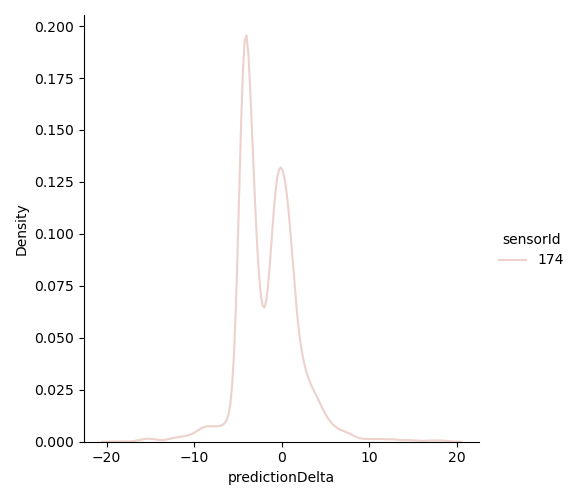

In [11]:
top_sensors = df_sensor_count.index.tolist()
top_sensors = [174]

# Filter the original dataframe to keep only these sensors
df_filtered = df_long_2[df_long_2["sensorId"].isin(top_sensors)]


plt.close()
sns.displot(data=df_filtered, x="predictionDelta", hue="sensorId", kind="kde")

<Axes: xlabel='timestep', ylabel='predictionDelta'>

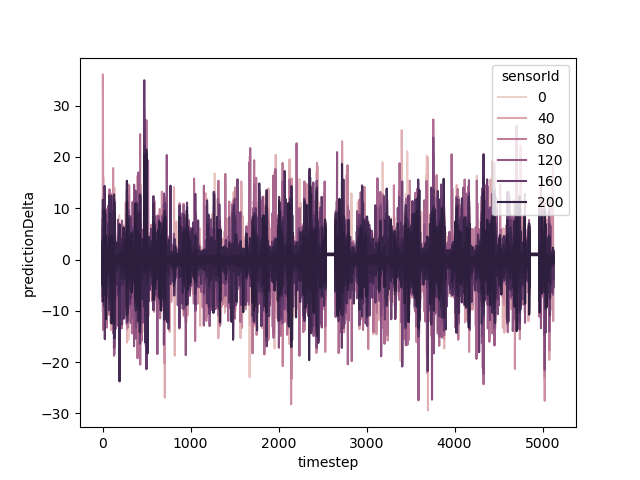

In [4]:
plt.close()
sns.lineplot(data=df_long, y="predictionDelta", x="timestep", hue="sensorId")

In [4]:
df_long.predictionDelta.mean()

-0.0457961514743658

In [9]:
df_long_2.predictionDelta.mean()

-0.39024096370557876

In [13]:
df_long_rolling = df_long.groupby('sensorId').rolling(12, on="timestep").mean()
df_long_rolling.head(20)

timestep  abs_predictionDelta  predictionDelta
sensorId                                                     
0        0            0                  NaN              NaN
         207          1                  NaN              NaN
         414          2                  NaN              NaN
         621          3                  NaN              NaN
         828          4                  NaN              NaN
         1035         5                  NaN              NaN
         1242         6                  NaN              NaN
         1449         7                  NaN              NaN
         1656         8                  NaN              NaN
         1863         9                  NaN              NaN
         2070        10                  NaN              NaN
         2277        11             0.816115         0.445148
         2484        12             0.730586         0.359619
         2691        13             0.668690         0.260751
         2898        14             0.597468         0.181852
         3105        15             0.540198         0.124581
         3312        16             0.497270         0.226923
         3519        17             0.415147         0.133716
         3726        18             0.372407         0.090975
         3933        19             0.327406         0.045974

In [23]:
df_low_error = df_long.groupby("timestep")["predictionDelta"].mean()
df_low_error = df_low_error[df_low_error < df_low_error.quantile(0.05)]  # Bottom 5% lowest errors
df_low_error.sort_values(ascending=True)  # Sort from lowest to highest

timestep
3143   -4.622648
2788   -4.600391
3765   -4.481770
3327   -4.461645
3144   -4.381926
          ...   
3482   -0.349217
4571   -0.349164
4022   -0.348661
3332   -0.348222
4574   -0.347727
Name: predictionDelta, Length: 257, dtype: float64

In [12]:
df_sensor_error = df_long_2.groupby("sensorId")["predictionDelta"].mean()

# Filter only negative values (cases where original is better)
df_sensor_error = df_sensor_error[df_sensor_error < 0]

# Sort from most negative (largest error difference) to least negative
df_sensor_error = df_sensor_error.sort_values(ascending=True)

for sensor_id, error in df_sensor_error.items():
    print(f"Sensor {sensor_id}: Average Prediction Delta = {error:.4f}")

Sensor 174: Average Prediction Delta = -1.6398
Sensor 160: Average Prediction Delta = -1.6394
Sensor 187: Average Prediction Delta = -1.5700
Sensor 12: Average Prediction Delta = -1.4237
Sensor 163: Average Prediction Delta = -1.3843
Sensor 61: Average Prediction Delta = -1.2701
Sensor 159: Average Prediction Delta = -1.1947
Sensor 0: Average Prediction Delta = -1.1881
Sensor 37: Average Prediction Delta = -1.0894
Sensor 164: Average Prediction Delta = -1.0874
Sensor 193: Average Prediction Delta = -1.0511
Sensor 127: Average Prediction Delta = -1.0463
Sensor 137: Average Prediction Delta = -1.0196
Sensor 113: Average Prediction Delta = -1.0161
Sensor 114: Average Prediction Delta = -0.9959
Sensor 73: Average Prediction Delta = -0.9321
Sensor 69: Average Prediction Delta = -0.9291
Sensor 91: Average Prediction Delta = -0.9190
Sensor 191: Average Prediction Delta = -0.9141
Sensor 155: Average Prediction Delta = -0.8933
Sensor 144: Average Prediction Delta = -0.8787
Sensor 139: Average P

In [1]:
sensor_id = 0  # Choose the sensor you want to visualize

sns.displot(data=df_long_2[df_long_2["sensorId"] == sensor_id], 
            x="predictionDelta", 
            kind="kde")

NameError: name 'sns' is not defined